import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
Problem Statement: 

The dose for effective analysis depends on two variables, the duration of treatment and weight gain between treatments.
the treatment duration variable has two levels short and long. the average weight gain between the treatments was in 3 categories
mid, moderate, severe. 
to study the interactive effect weight gain and the treatment duration.

to use an CSV file dialysis.csv 

Step1: to import dialysis.csv into python

In [6]:
import pyforest 
from statsmodels.formula.api import ols #for n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm #for n-way ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd #for performing the Tukey-HSD test
from statsmodels.stats.multicomp import MultiComparison #To compare the levels of independent Var & dependent Var
sns.set()

<IPython.core.display.Javascript object>

In [1]:
df = pd.read_csv('C://Users//Chintu//Downloads//Dialysis.csv')
df.head()

<IPython.core.display.Javascript object>

,Duration,Weight_Gain,Patient,Days
0,1,1,1,0
1,1,1,2,2
2,1,1,3,1
3,1,1,4,3
4,1,1,5,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
Duration       60 non-null int64
Weight_Gain    60 non-null int64
Patient        60 non-null int64
Days           60 non-null int64
dtypes: int64(4)
memory usage: 2.0 KB


# Perform one-way ANOVA where your categorical variable is Weight Gain and continous variable is days

In [4]:
df['Weight_Gain'] = df['Weight_Gain'].astype('category')

In [5]:
df['Weight_Gain'].value_counts()

3    20
2    20
1    20
Name: Weight_Gain, dtype: int64

In [7]:
formula = 'Days ~ C(Weight_Gain)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                  df       sum_sq     mean_sq          F    PR(>F)
C(Weight_Gain)   2.0   760.433333  380.216667  11.510091  0.000063
Residual        57.0  1882.900000   33.033333        NaN       NaN


We reject the Null hypothesis the p values is less than 0.5

Do a tukeyhsd test to further verify the significance

In [8]:
mc = MultiComparison(df['Days'], df['Weight_Gain'])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2     3.05 0.2226 -1.3236  7.4236  False
     1      3      8.6  0.001  4.2264 12.9736   True
     2      3     5.55 0.0095  1.1764  9.9236   True
----------------------------------------------------
[1 2 3]


## Let perform One way ANOVA with the variable "Duration" with respect to Days.

In [10]:
df['Duration'] =  pd.Categorical(df['Duration'])

<IPython.core.display.Javascript object>

In [11]:
formula = 'Days ~ C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

               df       sum_sq     mean_sq         F  PR(>F)
C(Duration)   1.0   209.066667  209.066667  4.981322  0.0295
Residual     58.0  2434.266667   41.970115       NaN     NaN


As p-Value is 0.0295 we reject the Null Hypothesis and accept there is a significant difference between Duration and Days

In [12]:
mc = MultiComparison(df['Days'], df['Duration'])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -3.7333 0.0295 -7.0817 -0.385   True
---------------------------------------------------
[1 2]


# 2-way ANOVA Test

In [14]:
formula = 'Days ~ C(Weight_Gain) + C(Duration) +C(Weight_Gain):C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df       sum_sq     mean_sq          F    PR(>F)
C(Weight_Gain)               2.0   760.433333  380.216667  13.120974  0.000023
C(Duration)                  1.0   209.066667  209.066667   7.214724  0.009587
C(Weight_Gain):C(Duration)   2.0   109.033333   54.516667   1.881327  0.162240
Residual                    54.0  1564.800000   28.977778        NaN       NaN


When the two variables are taken together 'Weight Gain' and 'Duration' both are still significant for the variable days.

The Joint interactive effect between 'Weight Gain' and 'Duration' on the number of days ':'

In [15]:
#Due to the Inclusion of the interaction effect term, we can see a slight change in the P-value of the first two treatments as 
#compared to the 2-Way ANOVA without the interaction effect terms. But we see that the p-value of the interaction effect. 
#Term of 'Weight_Gain' and 'Duration' suggests that the Null Hypothesis is true in this case. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

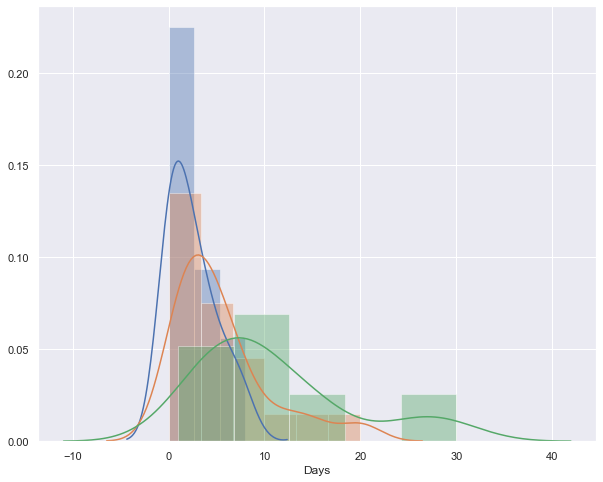

In [18]:
plt.figure(figsize = (10,8))
sns.distplot(df.loc[df["Weight_Gain"] == 1]["Days"])
sns.distplot(df.loc[df["Weight_Gain"] == 2]["Days"])
sns.distplot(df.loc[df["Weight_Gain"] == 3]["Days"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

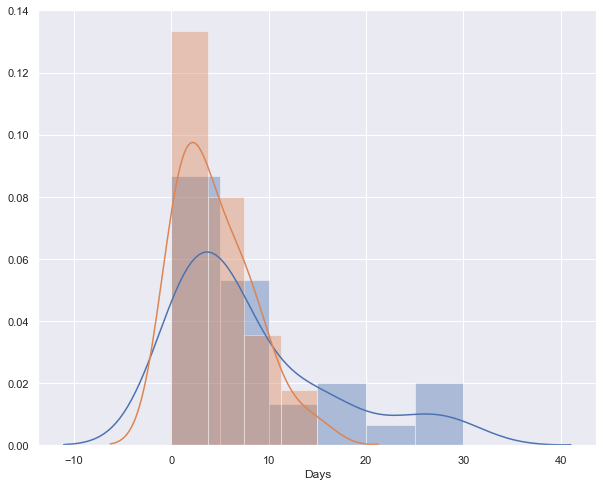

In [19]:
plt.figure(figsize = (10,8))
sns.distplot(df.loc[df["Duration"] == 1]["Days"])
sns.distplot(df.loc[df["Duration"] == 2]["Days"])

In [21]:
from scipy.stats import shapiro
shapiro(df["Days"][df["Weight_Gain"] == 1])

(0.8766031265258789, 0.015379254706203938)

In [22]:
shapiro(df["Days"][df["Weight_Gain"] == 2])

(0.8416277766227722, 0.0038713160902261734)

In [23]:
shapiro(df["Days"][df["Weight_Gain"] == 3])

(0.8756936192512512, 0.014815730042755604)

In [24]:
shapiro(df["Days"][df["Duration"] == 1])

(0.8359896540641785, 0.0003199226630385965)

In [25]:
shapiro(df["Days"][df["Duration"] == 2])

(0.9139823913574219, 0.018777471035718918)

In [26]:
from scipy.stats import pearsonr

In [27]:
a = df.loc[df["Weight_Gain"] == 1]
b = df.loc[df["Weight_Gain"] == 2]
c = df.loc[df["Weight_Gain"] == 3]

In [29]:
pearsonr(a['Days'], b['Days'])

(0.27705837127450894, 0.23697216917630162)

In [30]:
pearsonr(a['Days'], c['Days'])

(0.16125322575794002, 0.4970249432311251)

In [31]:
pearsonr(b['Days'], c['Days'])

(0.31781502860084654, 0.17209259784953204)

In [32]:
from scipy.stats import levene

In [33]:
levene(df['Days'][df['Weight_Gain'] == 1],
      df['Days'][df['Weight_Gain'] == 2], 
      df['Days'][df['Weight_Gain'] == 3])

LeveneResult(statistic=4.160577378135353, pvalue=0.020577781793351096)

In [34]:
#P value is less than 0.05 reject null hypothesis

In [35]:
mc = MultiComparison(df['Days'], df['Weight_Gain'])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2     3.05 0.2226 -1.3236  7.4236  False
     1      3      8.6  0.001  4.2264 12.9736   True
     2      3     5.55 0.0095  1.1764  9.9236   True
----------------------------------------------------
[1 2 3]
